In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import xarray as xr

mask = xr.open_dataset("Data/Other/NW_masks.nc")
station_coords = pd.read_csv('Data/Other/stations_coordinates.csv')

In [3]:
mask

<xarray.Dataset>
Dimensions:    (latitude: 227, longitude: 315)
Coordinates:
    step       timedelta64[ns] ...
    surface    int64 ...
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Data variables:
    lsm        (latitude, longitude) float32 ...
    p3008      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-10-05T13:00:48 GRIB to CDM+CF via cfgrib-0....

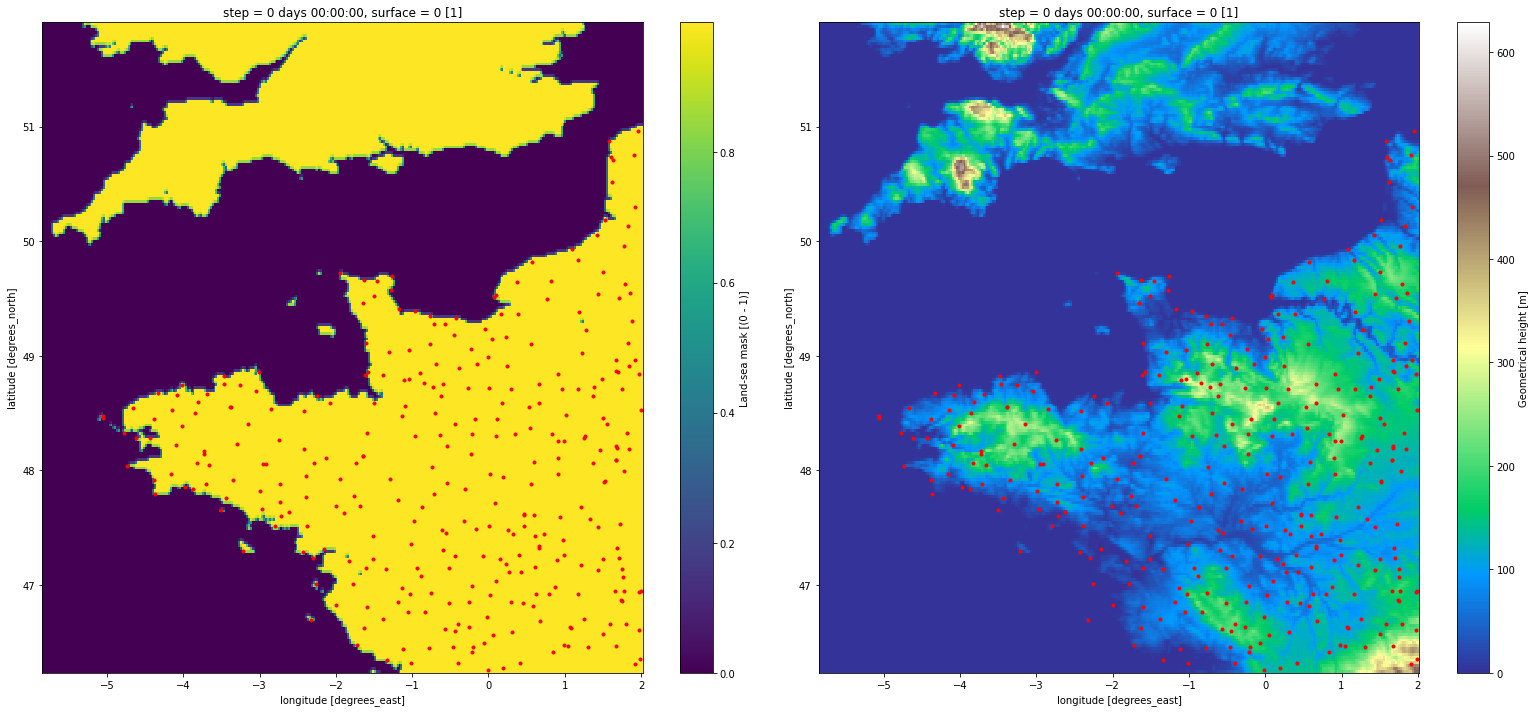

In [4]:
fig, ax = plt.subplots(1,2, figsize=(22, 10))

mask["lsm"].plot(ax=ax[0])
ax[0].plot(station_coords["lon"], station_coords["lat"], "r.")
vmin = mask["p3008"].values.min()
vmax = mask["p3008"].values.max()
mask["p3008"].plot(ax=ax[1], cmap="terrain", vmin=vmin, vmax=vmax)
ax[1].plot(station_coords["lon"], station_coords["lat"], "r.")
plt.tight_layout()
plt.show()

In [4]:
year = "2017"
date = "0214"
model = "arome"
# data = xr.open_dataset(f"Data/Train/2D_{model}_{year}/2D_{model}_{year}{date}.nc")
data = xr.open_dataset(f"Data/Train/X_forecast/2D_{model}_{year}{date}.nc")

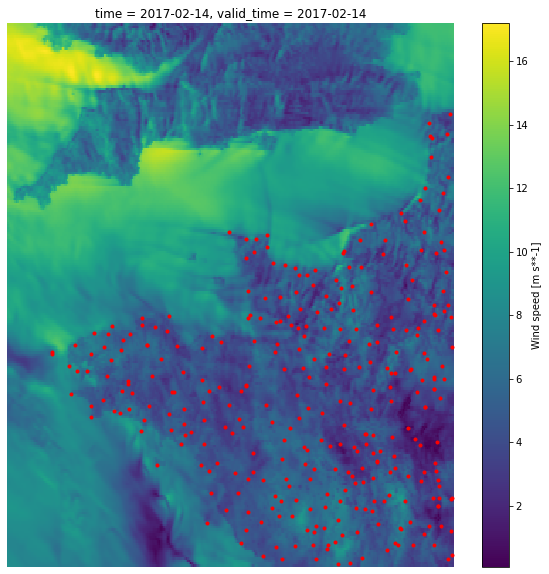

In [6]:
feature = "tp"
plt.figure(figsize=(10,10))
data["ws"].sel(valid_time='2017-02-14T00:00:00.000000000').plot(ax=plt.gca())
plt.plot(station_coords["lon"], station_coords["lat"], "r.")
plt.axis('off')
plt.show()

In [7]:
station = station_coords.iloc[10]
station_lat, station_lon = station[["lat", "lon"]]
window_size = 8.5 * 0.025
min_lat = station_lat - window_size
max_lat = station_lat + window_size
min_lon = station_lon - window_size
max_lon = station_lon + window_size

mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon)
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)

cropped = data.where(mask_lon & mask_lat, drop=True)
cropped.to_dataframe()["tp"]

valid_time  latitude   longitude  Id    
2017-02-14  47.846001  -2.817     409_0          NaN
                                  409_1          NaN
                                  409_2          NaN
                                  409_3          NaN
                                  409_4          NaN
                                              ...   
2017-02-15  47.445999  -2.417     409_20    3.989846
                                  409_21    3.989846
                                  409_22    3.989846
                                  409_23    3.989846
                                  409_24    3.989846
Name: tp, Length: 180625, dtype: float32

In [20]:
width = 7.5
cropped_samples = []
count_valid = 0
n = len(station_coords)
for i in tqdm(range(n)):
    station = station_coords.iloc[i]
    station_lat, station_lon = station[["lat", "lon"]]
    window_size = width * 0.025
    min_lat = station_lat - window_size
    max_lat = station_lat + window_size
    min_lon = station_lon - window_size
    max_lon = station_lon + window_size

    mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon)
    mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)

    cropped = data.where(mask_lon & mask_lat, drop=True)
    # print(cropped["ws"].shape)
    if cropped["ws"].shape == (25, 2*width, 2*width):
        count_valid += 1
        cropped_samples.append(cropped)

print(len(station_coords), count_valid, count_valid / len(station_coords))

100%|██████████| 325/325 [00:15<00:00, 21.22it/s]

325 304 0.9353846153846154


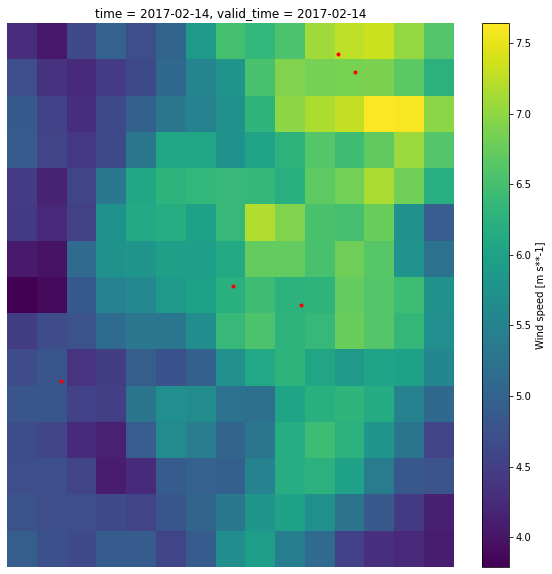

In [21]:
feature = "ws"
plt.figure(figsize=(10,10))
cropped_samples[0]["ws"].sel(valid_time=f'{year}-{date[:2]}-{date[2:]}T00:00:00.000000000').plot(ax=plt.gca())
plt.plot(station_coords["lon"], station_coords["lat"], "r.")
plt.axis('off')
plt.show()

In [5]:
data#.loc[dict(latitude=slice(47, 50))]

<xarray.Dataset>
Dimensions:     (latitude: 227, longitude: 315, valid_time: 25, Id: 25)
Coordinates:
    time        datetime64[ns] ...
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
  * Id          (Id) object '409_0' '409_1' '409_2' ... '409_23' '409_24'
Data variables:
    ws          (valid_time, latitude, longitude) float32 ...
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:02:47 GRIB to CDM+CF via cfgrib-0....

In [4]:
# data_train = pd.read_csv("Data/Train/tabular_train.csv")
baseline_observation = pd.read_csv("Data/Train/Baselines/Baseline_observation_train.csv")
data_ids = baseline_observation["Id"]

In [13]:
X_station = pd.read_csv("Data/Train/X_station_train.csv", parse_dates=["date"])
X_station["Id_split"] = X_station["Id"].str.split("_")
X_station["hour"] = X_station["Id_split"].apply(lambda s: s[-1]).astype(int)
X_station["Id"] = X_station["Id_split"].apply(lambda s: s[:2]).str.join("_")
X_station= X_station.drop(columns="Id_split")
X_station = X_station.groupby("Id").first()
X_station["day"] = X_station["date"].dt.day.astype(int)
X_station["month"] = X_station["date"].dt.month.astype(int)
X_station["year"] = X_station["date"].dt.year.astype(int)
X_station = X_station.reset_index()

In [27]:
X_station.loc[:,["day", "month", "year"]] = X_station[["day", "month", "year"]].astype(int)

In [28]:
data_train = baseline_observation.merge(X_station[["Id", "day", "month", "year"]], on="Id", how="left")

In [29]:
data_train

,number_sta,date,Prediction,Id,day,month,year
0,14066001,2016-01-02,0.2,14066001_0,1.0,1.0,2016.0
1,14126001,2016-01-02,0.5,14126001_0,1.0,1.0,2016.0
2,14137001,2016-01-02,NaN,14137001_0,1.0,1.0,2016.0
3,14216001,2016-01-02,0.6,14216001_0,1.0,1.0,2016.0
4,14296001,2016-01-02,0.2,14296001_0,1.0,1.0,2016.0
...,...,...,...,...,...,...,...
183493,86137003,2017-12-30,1.2,86137003_728,29.0,12.0,2017.0
183494,86165005,2017-12-30,1.2,86165005_728,29.0,12.0,2017.0
183495,86272002,2017-12-30,1.6,86272002_728,29.0,12.0,2017.0
183496,91200002,2017-12-30,7.3,91200002_728,29.0,12.0,2017.0


In [33]:
n_id = 100 #len(data_ids) // 8
n_features = 9
time_steps = 25
pixel_width = 15
X = np.zeros((n_id, pixel_width, pixel_width, n_features * time_steps), dtype="float32")
for i in range(n_id):
    Id = data_train["Id"].iloc[i]
    day = int(data_train["day"].iloc[i])
    month = int(data_train["month"].iloc[i])
    year = int(data_train["year"].iloc[i])
    print(Id, f"Data/Train/X_forecast/2D_arome_{year:02}{month:02}{day:02}.nc")
    # data = xr.open_dataset(f"Data/Train/X_forecast/2D_arome_{year}{date}.nc")
    

14066001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14126001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14137001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14216001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14296001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14357002_0 Data/Train/X_forecast/2D_arome_20160101.nc
14366002_0 Data/Train/X_forecast/2D_arome_20160101.nc
14372001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14501002_0 Data/Train/X_forecast/2D_arome_20160101.nc
14515001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14577003_0 Data/Train/X_forecast/2D_arome_20160101.nc
14578001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14624001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14659001_0 Data/Train/X_forecast/2D_arome_20160101.nc
14762004_0 Data/Train/X_forecast/2D_arome_20160101.nc
17218001_0 Data/Train/X_forecast/2D_arome_20160101.nc
22016001_0 Data/Train/X_forecast/2D_arome_20160101.nc
22092001_0 Data/Train/X_forecast/2D_arome_20160101.nc
22113006_0 Data/Train/X_fore